## Data Loading

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pii-detection-removal-from-educational-data/sample_submission.csv
/kaggle/input/pii-detection-removal-from-educational-data/train.json
/kaggle/input/pii-detection-removal-from-educational-data/test.json


In [2]:
input_dir = '/kaggle/input/pii-detection-removal-from-educational-data'

In [3]:
os.path.join(input_dir, 'sample_submission.csv')

'/kaggle/input/pii-detection-removal-from-educational-data/sample_submission.csv'

In [4]:
import json
train_data = json.load(open(os.path.join(input_dir, 'train.json')))
test_data = json.load(open(os.path.join(input_dir, 'test.json')))

train = pd.json_normalize(train_data)
test = pd.json_normalize(test_data)
submission = pd.read_csv(os.path.join(input_dir, 'sample_submission.csv'))

All of the essays were written in response to a single assignment prompt,  
which asked students to apply course material to a real-world problem. 

A majority of the essays are reserved for the test set (70%),  
so competitors are encouraged to use external datasets  
that are publicly available to bolster the training data.

# Glimpse

In [5]:
train.head(10)

,document,full_text,tokens,trailing_whitespace,labels
0,7,Design Thinking for innovation reflexion-Avril...,"[Design, Thinking, for, innovation, reflexion,...","[True, True, True, True, False, False, True, F...","[O, O, O, O, O, O, O, O, O, B-NAME_STUDENT, I-..."
1,10,Diego Estrada\n\nDesign Thinking Assignment\n\...,"[Diego, Estrada, \n\n, Design, Thinking, Assig...","[True, False, False, True, True, False, False,...","[B-NAME_STUDENT, I-NAME_STUDENT, O, O, O, O, O..."
2,16,Reporting process\n\nby Gilberto Gamboa\n\nCha...,"[Reporting, process, \n\n, by, Gilberto, Gambo...","[True, False, False, True, True, False, False,...","[O, O, O, O, B-NAME_STUDENT, I-NAME_STUDENT, O..."
3,20,Design Thinking for Innovation\n\nSindy Samaca...,"[Design, Thinking, for, Innovation, \n\n, Sind...","[True, True, True, False, False, True, False, ...","[O, O, O, O, O, B-NAME_STUDENT, I-NAME_STUDENT..."
4,56,Assignment: Visualization Reflection Submitt...,"[Assignment, :, , Visualization, , Reflecti...","[False, False, False, False, False, False, Fal...","[O, O, O, O, O, O, O, O, O, O, O, O, B-NAME_ST..."
5,86,Cheese Startup - Learning Launch ​by Eladio Am...,"[Cheese, Startup, -, Learning, Launch, ​by, El...","[True, True, True, True, True, True, True, Fal...","[O, O, O, O, O, O, B-NAME_STUDENT, I-NAME_STUD..."
6,93,Silvia Villalobos\n\nChallenge:\n\nThere is a ...,"[Silvia, Villalobos, \n\n, Challenge, :, \n\n,...","[True, False, False, False, False, False, True...","[B-NAME_STUDENT, I-NAME_STUDENT, O, O, O, O, O..."
7,104,Storytelling The Path to Innovation\n\nDr Sak...,"[Storytelling, , The, Path, to, Innovation, \...","[True, False, True, True, True, False, False, ...","[O, O, O, O, O, O, O, O, B-NAME_STUDENT, I-NAM..."
8,112,Reflection – Learning Launch\n\nFrancisco Ferr...,"[Reflection, –, Learning, Launch, \n\n, Franci...","[True, True, True, False, False, True, False, ...","[O, O, O, O, O, B-NAME_STUDENT, I-NAME_STUDENT..."
9,123,Gandhi Institute of Technology and Management ...,"[Gandhi, Institute, of, Technology, and, Manag...","[True, True, True, True, True, True, False, Tr...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."


In [6]:
train.loc[0, "full_text"]

"Design Thinking for innovation reflexion-Avril 2021-Nathalie Sylla\n\nChallenge & selection\n\nThe tool I use to help all stakeholders finding their way through the complexity of a project is the  mind map.\n\nWhat exactly is a mind map? According to the definition of Buzan T. and Buzan B. (1999, Dessine-moi  l'intelligence. Paris: Les Éditions d'Organisation.), the mind map (or heuristic diagram) is a graphic  representation technique that follows the natural functioning of the mind and allows the brain's  potential to be released. Cf Annex1\n\nThis tool has many advantages:\n\n•  It is accessible to all and does not require significant material investment and can be done  quickly\n\n•  It is scalable\n\n•  It allows categorization and linking of information\n\n•  It can be applied to any type of situation: notetaking, problem solving, analysis, creation of  new ideas\n\n•  It is suitable for all people and is easy to learn\n\n•  It is fun and encourages exchanges\n\n•  It makes visi

In [7]:
print(train.loc[0, "full_text"])

Design Thinking for innovation reflexion-Avril 2021-Nathalie Sylla

Challenge & selection

The tool I use to help all stakeholders finding their way through the complexity of a project is the  mind map.

What exactly is a mind map? According to the definition of Buzan T. and Buzan B. (1999, Dessine-moi  l'intelligence. Paris: Les Éditions d'Organisation.), the mind map (or heuristic diagram) is a graphic  representation technique that follows the natural functioning of the mind and allows the brain's  potential to be released. Cf Annex1

This tool has many advantages:

•  It is accessible to all and does not require significant material investment and can be done  quickly

•  It is scalable

•  It allows categorization and linking of information

•  It can be applied to any type of situation: notetaking, problem solving, analysis, creation of  new ideas

•  It is suitable for all people and is easy to learn

•  It is fun and encourages exchanges

•  It makes visible the dimension of pr

In [8]:
len(train.loc[0, "tokens"])

753

The documents were tokenized using the SpaCy English tokenizer.

In [9]:
train.loc[0, "tokens"][:200]

['Design',
 'Thinking',
 'for',
 'innovation',
 'reflexion',
 '-',
 'Avril',
 '2021',
 '-',
 'Nathalie',
 'Sylla',
 '\n\n',
 'Challenge',
 '&',
 'selection',
 '\n\n',
 'The',
 'tool',
 'I',
 'use',
 'to',
 'help',
 'all',
 'stakeholders',
 'finding',
 'their',
 'way',
 'through',
 'the',
 'complexity',
 'of',
 'a',
 'project',
 'is',
 'the',
 ' ',
 'mind',
 'map',
 '.',
 '\n\n',
 'What',
 'exactly',
 'is',
 'a',
 'mind',
 'map',
 '?',
 'According',
 'to',
 'the',
 'definition',
 'of',
 'Buzan',
 'T.',
 'and',
 'Buzan',
 'B.',
 '(',
 '1999',
 ',',
 'Dessine',
 '-',
 'moi',
 ' ',
 "l'intelligence",
 '.',
 'Paris',
 ':',
 'Les',
 'Éditions',
 "d'Organisation",
 '.',
 ')',
 ',',
 'the',
 'mind',
 'map',
 '(',
 'or',
 'heuristic',
 'diagram',
 ')',
 'is',
 'a',
 'graphic',
 ' ',
 'representation',
 'technique',
 'that',
 'follows',
 'the',
 'natural',
 'functioning',
 'of',
 'the',
 'mind',
 'and',
 'allows',
 'the',
 'brain',
 "'s",
 ' ',
 'potential',
 'to',
 'be',
 'released',
 '.',
 'Cf

In [10]:
len(train.loc[0, "trailing_whitespace"])

753

trailing_whitespace (list)  
(bool): a boolean value indicating whether each token is followed by whitespace.

In [11]:
'''
"Design Thinking for innovation reflexion-Avril 2021-Nathalie Sylla\n\nChallenge & selection\n\nThe tool"
      T        T   T          T         FF    T    FF       T     F   F        T T         F   F  T    T
'''

'\n"Design Thinking for innovation reflexion-Avril 2021-Nathalie Sylla\n\nChallenge & selection\n\nThe tool"\n      T        T   T          T         FF    T    FF       T     F   F        T T         F   F  T    T\n'

In [12]:
train.loc[0, "trailing_whitespace"][:18]

[True,
 True,
 True,
 True,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 True,
 True,
 False,
 False,
 True,
 True]

In [13]:
len(train.loc[0, "labels"])

753

In [14]:
train.loc[0, "labels"]

['O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'B-NAME_STUDENT',
 'I-NAME_STUDENT',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 '

In [15]:
test.head(10)

,document,full_text,tokens,trailing_whitespace
0,7,Design Thinking for innovation reflexion-Avril...,"[Design, Thinking, for, innovation, reflexion,...","[True, True, True, True, False, False, True, F..."
1,10,Diego Estrada\n\nDesign Thinking Assignment\n\...,"[Diego, Estrada, \n\n, Design, Thinking, Assig...","[True, False, False, True, True, False, False,..."
2,16,Reporting process\n\nby Gilberto Gamboa\n\nCha...,"[Reporting, process, \n\n, by, Gilberto, Gambo...","[True, False, False, True, True, False, False,..."
3,20,Design Thinking for Innovation\n\nSindy Samaca...,"[Design, Thinking, for, Innovation, \n\n, Sind...","[True, True, True, False, False, True, False, ..."
4,56,Assignment: Visualization Reflection Submitt...,"[Assignment, :, , Visualization, , Reflecti...","[False, False, False, False, False, False, Fal..."
5,86,Cheese Startup - Learning Launch ​by Eladio Am...,"[Cheese, Startup, -, Learning, Launch, ​by, El...","[True, True, True, True, True, True, True, Fal..."
6,93,Silvia Villalobos\n\nChallenge:\n\nThere is a ...,"[Silvia, Villalobos, \n\n, Challenge, :, \n\n,...","[True, False, False, False, False, False, True..."
7,104,Storytelling The Path to Innovation\n\nDr Sak...,"[Storytelling, , The, Path, to, Innovation, \...","[True, False, True, True, True, False, False, ..."
8,112,Reflection – Learning Launch\n\nFrancisco Ferr...,"[Reflection, –, Learning, Launch, \n\n, Franci...","[True, True, True, False, False, True, False, ..."
9,123,Gandhi Institute of Technology and Management ...,"[Gandhi, Institute, of, Technology, and, Manag...","[True, True, True, True, True, True, False, Tr..."


In [16]:
'''
nunique()는 해시 테이블을 사용해 중복된 값을 센다. (i.e. 고유한 값이 몇개인지 센다)
값 자체를 해시함수에 통과시켜 키를 구해 해시테이블에 저장한다.
train의 행의 개수와 고유한 값이 일치한다면 데이터 품질이 좋다고 추측해볼 수 있다.
False 라면, 그리고 중복된 값이 많다면 "데이터 누수"가 많은 것이고 이는 학습시 과적합의 원인이 될 수 있다.
'''
assert train['document'].nunique() == train.shape[0]


In [17]:
train['document'].nunique()

6807

In [18]:
train.shape[0]

6807

In [19]:
full_ner_labels = [
    'B-NAME_STUDENT', 'I-NAME_STUDENT',
    'B-URL_PERSONAL', 'I-URL_PERSONAL',
    'B-ID_NUM', 'I-ID_NUM',
    'B-EMAIL', 'I-EMAIL',
    'B-STREET_ADDRESS', 'I-STREET_ADDRESS',
    'B-PHONE_NUM', 'I-PHONE_NUM',
    'B-USERNAME', 'I-USERNAME'
]

## EDA setting for NER
**goal** : train set의 텍스트에서 발견된 entities('O'가 아닌 full_ner_labels)의 종류와 빈도수를 분석

In [20]:
train_EDA = train.copy()

train_EDA['ner_labels'] = train_EDA['labels'].apply(
    lambda x: [item for item in x if item != 'O'])
'''
apply 함수는 train_EDA 데이터 프레임의 'labels' 열에 적용되어
'labels' 열의 각 원소(즉, 각 행에 해당하는 레이블 리스트)에 대해 람다 함수를 실행한다.
즉 람다함수의 x는 리스트, 다시 말해 각 행의 'labels' 값을 받는다.
'''
train_EDA

,document,full_text,tokens,trailing_whitespace,labels,ner_labels
0,7,Design Thinking for innovation reflexion-Avril...,"[Design, Thinking, for, innovation, reflexion,...","[True, True, True, True, False, False, True, F...","[O, O, O, O, O, O, O, O, O, B-NAME_STUDENT, I-...","[B-NAME_STUDENT, I-NAME_STUDENT, B-NAME_STUDEN..."
1,10,Diego Estrada\n\nDesign Thinking Assignment\n\...,"[Diego, Estrada, \n\n, Design, Thinking, Assig...","[True, False, False, True, True, False, False,...","[B-NAME_STUDENT, I-NAME_STUDENT, O, O, O, O, O...","[B-NAME_STUDENT, I-NAME_STUDENT, B-NAME_STUDEN..."
2,16,Reporting process\n\nby Gilberto Gamboa\n\nCha...,"[Reporting, process, \n\n, by, Gilberto, Gambo...","[True, False, False, True, True, False, False,...","[O, O, O, O, B-NAME_STUDENT, I-NAME_STUDENT, O...","[B-NAME_STUDENT, I-NAME_STUDENT]"
3,20,Design Thinking for Innovation\n\nSindy Samaca...,"[Design, Thinking, for, Innovation, \n\n, Sind...","[True, True, True, False, False, True, False, ...","[O, O, O, O, O, B-NAME_STUDENT, I-NAME_STUDENT...","[B-NAME_STUDENT, I-NAME_STUDENT]"
4,56,Assignment: Visualization Reflection Submitt...,"[Assignment, :, , Visualization, , Reflecti...","[False, False, False, False, False, False, Fal...","[O, O, O, O, O, O, O, O, O, O, O, O, B-NAME_ST...","[B-NAME_STUDENT, I-NAME_STUDENT]"
...,...,...,...,...,...,...
6802,22678,EXAMPLE – JOURNEY MAP\n\nTHE CHALLENGE My w...,"[EXAMPLE, –, JOURNEY, MAP, \n\n, THE, CHALLENG...","[True, True, True, False, False, True, True, F...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",[]
6803,22679,Why Mind Mapping?\n\nMind maps are graphical r...,"[Why, Mind, Mapping, ?, \n\n, Mind, maps, are,...","[True, True, False, False, False, True, True, ...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",[]
6804,22681,"Challenge\n\nSo, a few months back, I had chos...","[Challenge, \n\n, So, ,, a, few, months, back,...","[False, False, False, True, True, True, True, ...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",[]
6805,22684,Brainstorming\n\nChallenge & Selection\n\nBrai...,"[Brainstorming, \n\n, Challenge, &, Selection,...","[False, False, True, True, False, False, True,...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",[]


In [21]:
train_EDA['count_ner_labels'] = train_EDA['ner_labels'].apply(len)
train_EDA.head(3)

,document,full_text,tokens,trailing_whitespace,labels,ner_labels,count_ner_labels
0,7,Design Thinking for innovation reflexion-Avril...,"[Design, Thinking, for, innovation, reflexion,...","[True, True, True, True, False, False, True, F...","[O, O, O, O, O, O, O, O, O, B-NAME_STUDENT, I-...","[B-NAME_STUDENT, I-NAME_STUDENT, B-NAME_STUDEN...",6
1,10,Diego Estrada\n\nDesign Thinking Assignment\n\...,"[Diego, Estrada, \n\n, Design, Thinking, Assig...","[True, False, False, True, True, False, False,...","[B-NAME_STUDENT, I-NAME_STUDENT, O, O, O, O, O...","[B-NAME_STUDENT, I-NAME_STUDENT, B-NAME_STUDEN...",4
2,16,Reporting process\n\nby Gilberto Gamboa\n\nCha...,"[Reporting, process, \n\n, by, Gilberto, Gambo...","[True, False, False, True, True, False, False,...","[O, O, O, O, B-NAME_STUDENT, I-NAME_STUDENT, O...","[B-NAME_STUDENT, I-NAME_STUDENT]",2


In [22]:
train_EDA['count_distinct_ner_labels'] = train_EDA['ner_labels'].apply(
lambda x: len(set(x)))
train_EDA.head(3)

,document,full_text,tokens,trailing_whitespace,labels,ner_labels,count_ner_labels,count_distinct_ner_labels
0,7,Design Thinking for innovation reflexion-Avril...,"[Design, Thinking, for, innovation, reflexion,...","[True, True, True, True, False, False, True, F...","[O, O, O, O, O, O, O, O, O, B-NAME_STUDENT, I-...","[B-NAME_STUDENT, I-NAME_STUDENT, B-NAME_STUDEN...",6,2
1,10,Diego Estrada\n\nDesign Thinking Assignment\n\...,"[Diego, Estrada, \n\n, Design, Thinking, Assig...","[True, False, False, True, True, False, False,...","[B-NAME_STUDENT, I-NAME_STUDENT, O, O, O, O, O...","[B-NAME_STUDENT, I-NAME_STUDENT, B-NAME_STUDEN...",4,2
2,16,Reporting process\n\nby Gilberto Gamboa\n\nCha...,"[Reporting, process, \n\n, by, Gilberto, Gambo...","[True, False, False, True, True, False, False,...","[O, O, O, O, B-NAME_STUDENT, I-NAME_STUDENT, O...","[B-NAME_STUDENT, I-NAME_STUDENT]",2,2


In [23]:
exploded_df = train_EDA['ner_labels'].explode()
'''
explode() 함수는 리스트 또는 리스트와 유사한 구조를 갖는 각 행을 받아서, 
리스트의 각 항목을 별도의 행으로 확장
'ner_labels' 열을 .explode() 함수로 풀어서 각 엔티티 레이블이 별도의 행을 가지도록 한다.
따라서 exploded_df 의 각 인덱스는 train_EDA['ner_labels'] 에서 해당 요소가 속한 행의 인덱스를 가리키게 된다
'''
exploded_df

0       B-NAME_STUDENT
0       I-NAME_STUDENT
0       B-NAME_STUDENT
0       I-NAME_STUDENT
0       B-NAME_STUDENT
             ...      
6802               NaN
6803               NaN
6804               NaN
6805               NaN
6806               NaN
Name: ner_labels, Length: 8601, dtype: object

In [24]:
dummies = pd.get_dummies(exploded_df)
'''
pd.get_dummies() 함수는 인자로 받은 테이블의 범주형 변수를 원핫인코딩 방식으로 변환한다.
여기서 범주는 exploded_df 에서 중복을 제거한 각 NER 레이블들이고, 이들은 새로운 더미 테이블에서 각 열(더미 변수)이 된다.
더미 테이블의 각 행은 exploded_df의 각 행과 같은 인덱스를 가진다.
이는 각 원-핫 인코딩된 벡터가 원래 exploded_df의 어떤 행에서 파생되었는지 추적할 수 있게 해준다.
따라서 더미테이블의 각 행은 exploded_df의 각 행에 있던 ner 레이블에 해당하는 열에만 1, 나머지는 0의 값을 가지는 원핫인코딩이 된다.
이 과정은 원본 테이블에서의 각 데이터 샘플들을
NER 레이블이라는 범주형 데이터만으로 재가공해 
(범주형 데이터를) 모델이 이해할 수 있는 형식(수치형 데이터)으로 바꿔준 것이다. 
(뒤에서 dummies.groupby('index').sum() 해줘야 비로소 완성된다.)
이 방법을 사용함으로써,
각 범주형 레이블(범주형 데이터)은 모델에 입력될 수 있는 독립적인 특성(수치형 데이터)으로 변환되어, 
더 정교한 학습과 예측이 가능해질 수도 있다.
(이 역시 마찬가지로 뒤에서 dummies.groupby('index').sum() 해줘야 그 가능성을 비로소 말할 수 있다.)
'''
dummies

,B-EMAIL,B-ID_NUM,B-NAME_STUDENT,B-PHONE_NUM,B-STREET_ADDRESS,B-URL_PERSONAL,B-USERNAME,I-ID_NUM,I-NAME_STUDENT,I-PHONE_NUM,I-STREET_ADDRESS,I-URL_PERSONAL
0,False,False,True,False,False,False,False,False,False,False,False,False
0,False,False,False,False,False,False,False,False,True,False,False,False
0,False,False,True,False,False,False,False,False,False,False,False,False
0,False,False,False,False,False,False,False,False,True,False,False,False
0,False,False,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
6802,False,False,False,False,False,False,False,False,False,False,False,False
6803,False,False,False,False,False,False,False,False,False,False,False,False
6804,False,False,False,False,False,False,False,False,False,False,False,False
6805,False,False,False,False,False,False,False,False,False,False,False,False


In [25]:
dummies = dummies.reset_index()
'''
.reset_index()를 호출하면 기존 인덱스는 'index'라는 이름의 컬럼으로 DataFrame에 추가되고, 
0부터 시작하는 새로운 인덱스가 연속적인 정수로 전체 행에 부여된다. 
선택적으로 drop=True 인자를 추가하여 기존 인덱스를 DataFrame에 포함시키지 않고 버릴 수 있다.
reset_index() 실행으로 기존 인덱스가 'index' 라는 이름의 열로 남는데
이 열은 뒤에서 dummies.groupby('index').sum() 을 하는데 사용된다.
또 마지막에 train_EDA.join(counted) 을 하는데도 사용된다.
즉 reset_index()를 하는 이유는 연속되는 정수로 인덱스를 초기화한 걸 쓰기 위해서가 아니라
원본 데이터의 인덱스를 'index' 라는 이름의 별도 칼럼으로 남기기 위해서다.
'''
dummies

,index,B-EMAIL,B-ID_NUM,B-NAME_STUDENT,B-PHONE_NUM,B-STREET_ADDRESS,B-URL_PERSONAL,B-USERNAME,I-ID_NUM,I-NAME_STUDENT,I-PHONE_NUM,I-STREET_ADDRESS,I-URL_PERSONAL
0,0,False,False,True,False,False,False,False,False,False,False,False,False
1,0,False,False,False,False,False,False,False,False,True,False,False,False
2,0,False,False,True,False,False,False,False,False,False,False,False,False
3,0,False,False,False,False,False,False,False,False,True,False,False,False
4,0,False,False,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8596,6802,False,False,False,False,False,False,False,False,False,False,False,False
8597,6803,False,False,False,False,False,False,False,False,False,False,False,False
8598,6804,False,False,False,False,False,False,False,False,False,False,False,False
8599,6805,False,False,False,False,False,False,False,False,False,False,False,False


In [26]:
dummies.columns
# I-EMAIL, I-USERNAME 이 없다.

Index(['index', 'B-EMAIL', 'B-ID_NUM', 'B-NAME_STUDENT', 'B-PHONE_NUM', 'B-STREET_ADDRESS', 'B-URL_PERSONAL', 'B-USERNAME', 'I-ID_NUM', 'I-NAME_STUDENT', 'I-PHONE_NUM', 'I-STREET_ADDRESS', 'I-URL_PERSONAL'], dtype='object')

In [27]:
len(dummies.columns) # index 빼면 12

13

In [28]:
full_ner_labels

['B-NAME_STUDENT',
 'I-NAME_STUDENT',
 'B-URL_PERSONAL',
 'I-URL_PERSONAL',
 'B-ID_NUM',
 'I-ID_NUM',
 'B-EMAIL',
 'I-EMAIL',
 'B-STREET_ADDRESS',
 'I-STREET_ADDRESS',
 'B-PHONE_NUM',
 'I-PHONE_NUM',
 'B-USERNAME',
 'I-USERNAME']

In [29]:
frequency = dummies.sum().sort_values(ascending=False)
'''
dummies.sum() : 더미 테이블의 각 열(원-핫 인코딩된 범주형 변수)에 대한 합계를 계산
즉 원핫인코딩된 데이터에서 각 열의 합계는 해당 범주(레이블)가 전체 데이터셋에서 몇번 등장했는지를 나타내는 빈도수가 된다.
다시 말해 각 NER 레이블의 전체 데이터셋 내 출현빈도수 계산.
'''
frequency

index               24697269
B-NAME_STUDENT          1365
I-NAME_STUDENT          1096
B-URL_PERSONAL           110
B-ID_NUM                  78
B-EMAIL                   39
I-STREET_ADDRESS          20
I-PHONE_NUM               15
B-PHONE_NUM                6
B-USERNAME                 6
B-STREET_ADDRESS           2
I-ID_NUM                   1
I-URL_PERSONAL             1
dtype: int64

In [30]:
ordered_columns = frequency.index.tolist()
'''
빈도수 기준 내림차순 정렬된 레이블들을 리스트로 변환 
'''
ordered_columns.remove("index") # 인덱스 원소 제거
ordered_columns

['B-NAME_STUDENT',
 'I-NAME_STUDENT',
 'B-URL_PERSONAL',
 'B-ID_NUM',
 'B-EMAIL',
 'I-STREET_ADDRESS',
 'I-PHONE_NUM',
 'B-PHONE_NUM',
 'B-USERNAME',
 'B-STREET_ADDRESS',
 'I-ID_NUM',
 'I-URL_PERSONAL']

In [31]:
counted = dummies.groupby('index').sum()
'''
dummies DataFrame을 'index' 열을 기준으로 그룹화한 후, 각 그룹 내의 값을 합산하는 과정을 수행
다시 말해, 'index' 열에 동일한 값(즉, 원본 데이터의 같은 인덱스를 가리키는 값)을 가진 행들을 찾아
그 행들의 값을 합산해서 하나의 행으로 합친다는 것이다.
이 과정은 원-핫 인코딩된 데이터에서 특히 유용한데, 
원본 데이터에서 한 데이터 포인트가 여러 범주에 해당할 경우, 
explode() 메소드를 통해 이를 여러 행으로 확장하고 원-핫 인코딩을 적용했을 때, 
각각의 범주가 별도의 행으로 표현되었을 것이다. 
따라서, 'index' 열을 기준으로 그룹화하고 합산하는 과정을 통해, 
이렇게 분리되었던 정보를 다시 원래의 데이터 포인트 단위로 집계하는 것.
이를 통해, 각 원본 데이터 샘플에 대해 해당하는 모든 범주형 데이터를 하나의 수치형 데이터로 바꿀 수 있게 된다.
이러한 변환 과정을 거치면, 각 데이터 샘플은 원본 데이터에 포함된 여러 범주형 레이블의 존재 유무 및 빈도를 나타내는 수치형 벡터로 표현되고
모델이 이해할 수 있는 데이터로 쓸수 있게 된다.
'''
counted

,B-EMAIL,B-ID_NUM,B-NAME_STUDENT,B-PHONE_NUM,B-STREET_ADDRESS,B-URL_PERSONAL,B-USERNAME,I-ID_NUM,I-NAME_STUDENT,I-PHONE_NUM,I-STREET_ADDRESS,I-URL_PERSONAL
index,,,,,,,,,,,,
0,0,0,3,0,0,0,0,0,3,0,0,0
1,0,0,2,0,0,0,0,0,2,0,0,0
2,0,0,1,0,0,0,0,0,1,0,0,0
3,0,0,1,0,0,0,0,0,1,0,0,0
4,0,0,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6802,0,0,0,0,0,0,0,0,0,0,0,0
6803,0,0,0,0,0,0,0,0,0,0,0,0
6804,0,0,0,0,0,0,0,0,0,0,0,0


,B-EMAIL,B-ID_NUM,B-NAME_STUDENT,B-PHONE_NUM,B-STREET_ADDRESS,B-URL_PERSONAL,B-USERNAME,I-ID_NUM,I-NAME_STUDENT,I-PHONE_NUM,I-STREET_ADDRESS,I-URL_PERSONAL
index,,,,,,,,,,,,
0,0,0,3,0,0,0,0,0,3,0,0,0
1,0,0,2,0,0,0,0,0,2,0,0,0
2,0,0,1,0,0,0,0,0,1,0,0,0
3,0,0,1,0,0,0,0,0,1,0,0,0
4,0,0,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6802,0,0,0,0,0,0,0,0,0,0,0,0
6803,0,0,0,0,0,0,0,0,0,0,0,0
6804,0,0,0,0,0,0,0,0,0,0,0,0


In [32]:
counted = counted.reindex(columns=full_ner_labels, fill_value=0)
'''
counted DataFrame의 컬럼(열)을 full_ner_labels 리스트에 정의된 순서대로 재배열하며, 
full_ner_labels에 있는데 counted에 없는 레이블에 대해서는 새로운 열을 추가하고 그 값들을 0으로 채우는 작업을 수행

'''
counted

,B-NAME_STUDENT,I-NAME_STUDENT,B-URL_PERSONAL,I-URL_PERSONAL,B-ID_NUM,I-ID_NUM,B-EMAIL,I-EMAIL,B-STREET_ADDRESS,I-STREET_ADDRESS,B-PHONE_NUM,I-PHONE_NUM,B-USERNAME,I-USERNAME
index,,,,,,,,,,,,,,
0,3,3,0,0,0,0,0,0,0,0,0,0,0,0
1,2,2,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6802,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6803,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6804,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [33]:
ordered_columns

['B-NAME_STUDENT',
 'I-NAME_STUDENT',
 'B-URL_PERSONAL',
 'B-ID_NUM',
 'B-EMAIL',
 'I-STREET_ADDRESS',
 'I-PHONE_NUM',
 'B-PHONE_NUM',
 'B-USERNAME',
 'B-STREET_ADDRESS',
 'I-ID_NUM',
 'I-URL_PERSONAL']

In [34]:
counted = counted[ordered_columns + 
                  [i for i in full_ner_labels if i not in ordered_columns]]
'''
counted[ordered_columns] 코드는 counted DataFrame의 컬럼들을 ordered_columns 리스트에 나열된 순서대로 재배열.
ordered_columns 리스트에는 결과 DataFrame에 포함시키고자 하는 모든 컬럼명이 포함되어 있어야 합니다.
ordered_columns의 순서가 결과 DataFrame의 컬럼 순서를 결정합니다.
ordered_columns에 포함되지 않은 counted DataFrame의 컬럼들은 결과에서 제외됩니다.
재배열한 후, ordered_columns에 포함되지 않은 나머지 full_ner_labels의 컬럼들을 counted DataFrame에 추가
'''
counted

,B-NAME_STUDENT,I-NAME_STUDENT,B-URL_PERSONAL,B-ID_NUM,B-EMAIL,I-STREET_ADDRESS,I-PHONE_NUM,B-PHONE_NUM,B-USERNAME,B-STREET_ADDRESS,I-ID_NUM,I-URL_PERSONAL,I-EMAIL,I-USERNAME
index,,,,,,,,,,,,,,
0,3,3,0,0,0,0,0,0,0,0,0,0,0,0
1,2,2,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6802,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6803,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6804,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [35]:
train_EDA = train_EDA.join(counted)
'''
인덱스를 기준으로 두 DataFrame을 결합
'''
sample_train = train_EDA.head(1)
sample_train

,document,full_text,tokens,trailing_whitespace,labels,ner_labels,count_ner_labels,count_distinct_ner_labels,B-NAME_STUDENT,I-NAME_STUDENT,B-URL_PERSONAL,B-ID_NUM,B-EMAIL,I-STREET_ADDRESS,I-PHONE_NUM,B-PHONE_NUM,B-USERNAME,B-STREET_ADDRESS,I-ID_NUM,I-URL_PERSONAL,I-EMAIL,I-USERNAME
0,7,Design Thinking for innovation reflexion-Avril...,"[Design, Thinking, for, innovation, reflexion,...","[True, True, True, True, False, False, True, F...","[O, O, O, O, O, O, O, O, O, B-NAME_STUDENT, I-...","[B-NAME_STUDENT, I-NAME_STUDENT, B-NAME_STUDEN...",6,2,3,3,0,0,0,0,0,0,0,0,0,0,0,0


## Display function

In [36]:
from bs4 import BeautifulSoup

ner_colors = {
    'B-NAME_STUDENT': 'rgb(255, 179, 179)',
    'I-NAME_STUDENT': 'rgb(139, 0, 0)',
    'B-URL_PERSONAL': 'rgb(255, 223, 179)',
    'I-URL_PERSONAL': 'rgb(255, 140, 0)',
    'B-ID_NUM': 'rgb((255, 255, 179)',
    'I-ID_NUM':  'rgb(204, 204, 0)',
    'B-EMAIL': 'rgb(179, 255, 179)',
    'I-EMAIL': 'rgb(0, 100, 0)',
    'B-STREET_ADDRESS':  'rgb(179, 223, 255)',
    'I-STREET_ADDRESS': 'rgb(0, 0, 139)',
    'B-PHONE_NUM': 'rgb(223, 179, 255)',
    'I-PHONE_NUM': 'rgb(75, 0, 130)',
    'B-USERNAME': 'rgb(255, 179, 223)',
    'I-USERNAME': 'rgb(231, 84, 128)',
}

In [37]:
def generate_legend():
    
    legend_html = '<div class="legend" style="margin-bottom: 100px;">'
    for entity, color in ner_colors.items():
        legend_html += f'<span style="color: {color}; margin-right: 10px;">{entity}</span>'
    legend_html += '</div>'
    
    return legend_html

In [38]:
'''
html legend 생성
legend = generate_legend()  
legend 

<div class="legend" style="margin-bottom: 10px;">
    <span style="color: rgb(255, 179, 179); margin-right: 10px;">B-NAME_STUDENT</span>
    <span style="color: rgb(139, 0, 0); margin-right: 10px;">I-NAME_STUDENT</span>
    <span style="color: rgb(255, 223, 179); margin-right: 10px;">B-URL_PERSONAL</span>
    <span style="color: rgb(255, 140, 0); margin-right: 10px;">I-URL_PERSONAL</span>
    <span style="color: rgb(255, 255, 179); margin-right: 10px;">B-ID_NUM</span>
    <span style="color: rgb(204, 204, 0); margin-right: 10px;">I-ID_NUM</span>
    <span style="color: rgb(179, 255, 179); margin-right: 10px;">B-EMAIL</span>
    <span style="color: rgb(0, 100, 0); margin-right: 10px;">I-EMAIL</span>
    <span style="color: rgb(179, 223, 255); margin-right: 10px;">B-STREET_ADDRESS</span>
    <span style="color: rgb(0, 0, 139); margin-right: 10px;">I-STREET_ADDRESS</span>
    <span style="color: rgb(223, 179, 255); margin-right: 10px;">B-PHONE_NUM</span>
    <span style="color: rgb(75, 0, 130); margin-right: 10px;">I-PHONE_NUM</span>
    <span style="color: rgb(255, 179, 223); margin-right: 10px;">B-USERNAME</span>
    <span style="color: rgb(231, 84, 128); margin-right: 10px;">I-USERNAME</span>
</div>

이 HTML 코드 조각은 웹 페이지에서 Named Entity Recognition (NER) 태그의 범례(legend)를 시각적으로 표현하는 부분입니다. 
<div class="legend" style="margin-bottom: 10px;">는 범례를 담고 있는 컨테이너입니다.
이 div에는 CSS 스타일 margin-bottom: 10px;이 적용되어, 다음 요소와의 간격을 설정합니다.
각 <span> 태그는 특정 NER 태그(엔티티 유형)와 그에 해당하는 색상을 나타냅니다

<div class="legend" style="margin-bottom: 100px;">: 
범례의 시작을 나타내는 <div> 태그입니다. 
이 div는 범례 전체를 감싸는 컨테이너 역할을 하며, 스타일은 margin-bottom을 10픽셀로 설정하여, 
<div> 태그(여기서는 범례를 담고 있는 div)와 그 아래에 위치하는 다음 요소와의 간격을 생성합니다.

<span style="color: rgb(...); margin-right: 10px;">...</span>: 
각각의 <span> 태그는 NER 엔티티 유형과 해당하는 색상을 표시합니다. 
style 속성에서 color를 사용해 텍스트 색상을 지정하고,
margin-right을 사용해 오른쪽에 10픽셀의 여백을 추가하여, 인접한 <span> 태그와의 간격을 설정합니다. 
각 라인의 색상(rgb(...))과 텍스트(B-NAME_STUDENT, I-NAME_STUDENT 등)는 해당 엔티티 유형을 나타내는 색상 코드와 라벨입니다. 
예를 들어, B-NAME_STUDENT는 학생 이름의 시작 부분을 나타내는 태그이며, 특정 색상 코드(rgb(255, 179, 179))로 표시됩니다.

</div>: 
범례 컨테이너를 닫는 div 태그입니다. 이 태그는 위에서 시작된 범례 div의 내용을 마무리합니다.
'''

'\nhtml legend 생성\nlegend = generate_legend()  \nlegend \n\n<div class="legend" style="margin-bottom: 10px;">\n    <span style="color: rgb(255, 179, 179); margin-right: 10px;">B-NAME_STUDENT</span>\n    <span style="color: rgb(139, 0, 0); margin-right: 10px;">I-NAME_STUDENT</span>\n    <span style="color: rgb(255, 223, 179); margin-right: 10px;">B-URL_PERSONAL</span>\n    <span style="color: rgb(255, 140, 0); margin-right: 10px;">I-URL_PERSONAL</span>\n    <span style="color: rgb(255, 255, 179); margin-right: 10px;">B-ID_NUM</span>\n    <span style="color: rgb(204, 204, 0); margin-right: 10px;">I-ID_NUM</span>\n    <span style="color: rgb(179, 255, 179); margin-right: 10px;">B-EMAIL</span>\n    <span style="color: rgb(0, 100, 0); margin-right: 10px;">I-EMAIL</span>\n    <span style="color: rgb(179, 223, 255); margin-right: 10px;">B-STREET_ADDRESS</span>\n    <span style="color: rgb(0, 0, 139); margin-right: 10px;">I-STREET_ADDRESS</span>\n    <span style="color: rgb(223, 179, 255); mar

In [39]:
'''
이 코드는 주어진 텍스트 내의 엔티티(단어나 구)를 강조 표시하고, 각 엔티티에 대한 레이블을 HTML 형식으로 시각화하는 함수입니다.
사용된 라이브러리는 BeautifulSoup이며, 이는 HTML과 XML 문서를 파싱하고 조작하기 위한 Python 라이브러리입니다. 코드의 주요 작업은 다음과 같습니다:

1. **범례 생성**: `generate_legend()` 함수를 호출하여 NER 엔티티 유형과 해당 색상 코드의 범례를 HTML 형식으로 생성합니다.

2. **BeautifulSoup 객체 초기화**: 생성된 범례를 `BeautifulSoup` 객체로 파싱합니다. 이 객체는 후속 조작을 위한 HTML 문서의 구조를 나타냅니다.

3. **변수 초기화**: `last_idx` 변수는 텍스트에서 현재 처리 중인 토큰의 위치를 추적하기 위해 사용됩니다. 초기값은 0입니다.

4. **텍스트 내 엔티티 강조**: 주어진 `tokens` (텍스트에서 추출한 토큰 목록)과 `labels` (각 토큰에 할당된 레이블 목록)를 순회합니다.
    - 각 토큰의 시작과 끝 위치를 찾습니다. `text.find(token, last_idx)`는 `last_idx` 이후에 `token`이 시작하는 위치를 반환합니다.
    - 토큰이 텍스트 내에서 발견되면 (`start != -1`), 현재 토큰의 시작점까지의 텍스트를 `soup` 객체에 추가합니다.
    - 레이블이 'O'가 아닌 경우(즉, 토큰이 특정 엔티티에 속함), 해당 토큰과 레이블에 대해 새로운 `<span>` 태그를 생성하고, 
    스타일을 적용하여 `soup` 객체에 추가합니다. 이 스타일에는 배경색, 글꼴, 패딩, 테두리 반경이 포함됩니다. 
    `ner_colors.get(label, "black")`는 레이블에 해당하는 색상을 반환하며, 레이블에 해당하는 색상이 없으면 기본값으로 "black"을 사용합니다.
    - 레이블이 'O'(즉, 비엔티티)인 경우, 토큰을 그대로 `soup` 객체에 추가합니다.

5. **남은 텍스트 추가**: 마지막 엔티티 이후의 텍스트를 `soup` 객체에 추가합니다.

6. **결과 반환**: `soup` 객체를 문자열로 변환하여 반환합니다.
`replace('\n', '<br/>')`를 사용하여 문자열 내의 모든 개행 문자를 `<br/>` 태그로 교체합니다. 이는 HTML 문서에서 줄바꿈을 올바르게 표시하기 위함입니다.

이 함수는 NER 시스템에서 식별된 엔티티를 시각적으로 강조 표시하고, 각 엔티티의 레이블을 표시하여, 웹 페이지나 다른 HTML 지원 환경에서 쉽게 이해하고 분석할 수 있게 해줍니다.
'''
def highlight_entities(text, tokens, labels):
    
    legend = generate_legend()
    soup = BeautifulSoup(legend, 'html.parser')
    
    last_idx = 0
    for token, label in zip(tokens, labels):
        start, end = text.find(token, last_idx), text.find(token, last_idx) + len(token)
        
        if start != -1: 
            soup.append(BeautifulSoup(text[last_idx:start], 'html.parser'))
            if label != 'O': 
                token_span = soup.new_tag(
                    'span', style=f'background-color: {ner_colors.get(label, "black")}; font-family: "Tahoma"; padding: 0 20px; border-radius: 3px;')
                token_span.string = token
                soup.append(token_span)
                
                label_span = soup.new_tag(
                    'span', style=f'background-color: {ner_colors.get(label, "black")}; font-family: Tahoma; font-weight: bold; padding: 0 20px; border-radius: 3px;')
                label_span.string = f' [{label}]'
                soup.append(label_span)
            else:
                soup.append(token)
                
            last_idx = end
            
    soup.append(BeautifulSoup(text[last_idx:], 'html.parser'))
    
    return str(soup).replace('\n', '<br/>')

In [40]:
'''
str.find(sub[, start[, end]])
str: 검색을 수행할 대상 문자열입니다.
sub: str 내에서 찾고자 하는 부분 문자열입니다.
start(선택적): 검색을 시작할 인덱스입니다. 이 파라미터를 생략하면 문자열의 시작부터 검색을 시작합니다.
end(선택적): 검색을 종료할 인덱스입니다. 이 파라미터를 생략하면 문자열의 끝까지 검색을 진행합니다.
찾고자 하는 부분 문자열이 처음으로 등장하는 위치의 인덱스를
찾고자 하는 부분 문자열이 주어진 문자열 내에 존재하지 않으면 -1을 반환
'''
last_idx = 0
text = "Design Thinking for innovation reflexion"
start, end = text.find("Design", last_idx), text.find("Design", last_idx) + len("Design") # last_idx 이후부터 토큰을 검색
start, end

(0, 6)

In [41]:
last_idx = 6
text = "Design Thinking for innovation reflexion"
start, end = text.find("Thinking", last_idx), text.find("Thinking", last_idx) + len("Thinkingn") # last_idx 이후부터 토큰을 검색
start, end

(7, 16)

In [42]:
text = "Design Thinking for innovation reflexion"
tokens = ["Design", "Thinking", "for", "innovation", "reflexion"]
labels = ["O", "O", "O", "O", "O"]

soup = []

last_idx = 0
for token, label in zip(tokens, labels):
    start, end = text.find(token, last_idx), text.find(token, last_idx) + len(token)

    if start != -1:
        soup.append((text[last_idx:start],"!"))
        if label != 'O':
            soup.append("token_span")
            soup.append("label_span")
        else:
            soup.append(token)

        last_idx = end

soup.append(text[last_idx:])
soup



[('', '!'),
 'Design',
 (' ', '!'),
 'Thinking',
 (' ', '!'),
 'for',
 (' ', '!'),
 'innovation',
 (' ', '!'),
 'reflexion',
 '']

In [43]:
text = "Design Thinking for innovation reflexion"
tokens = ["Design", "Thinking", "for", "innovation", "reflexion"]
labels = ["O", "O", "O", "B", "I"]

example = highlight_entities(text, tokens, labels)
example
'''
<div class="legend" style="margin-bottom: 100px;">
    <span style="color: rgb(255, 179, 179); margin-right: 10px;">B-NAME_STUDENT</span>
    <span style="color: rgb(139, 0, 0); margin-right: 10px;">I-NAME_STUDENT</span>
    <span style="color: rgb(255, 223, 179); margin-right: 10px;">B-URL_PERSONAL</span>
    <span style="color: rgb(255, 140, 0); margin-right: 10px;">I-URL_PERSONAL</span>
    <span style="color: rgb((255, 255, 179); margin-right: 10px;">B-ID_NUM</span>
    <span style="color: rgb(204, 204, 0); margin-right: 10px;">I-ID_NUM</span>
    <span style="color: rgb(179, 255, 179); margin-right: 10px;">B-EMAIL</span>
    <span style="color: rgb(0, 100, 0); margin-right: 10px;">I-EMAIL</span>
    <span style="color: rgb(179, 223, 255); margin-right: 10px;">B-STREET_ADDRESS</span>
    <span style="color: rgb(0, 0, 139); margin-right: 10px;">I-STREET_ADDRESS</span>
    <span style="color: rgb(223, 179, 255); margin-right: 10px;">B-PHONE_NUM</span>
    <span style="color: rgb(75, 0, 130); margin-right: 10px;">I-PHONE_NUM</span>
    <span style="color: rgb(255, 179, 223); margin-right: 10px;">B-USERNAME</span>
    <span style="color: rgb(231, 84, 128); margin-right: 10px;">I-USERNAME</span>
</div>
Design Thinking for 
<span style='background-color: black; font-family: "Tahoma"; padding: 0 20px; border-radius: 3px;'>innovation</span>
<span style="background-color: black; font-family: Tahoma; font-weight: bold; padding: 0 20px; border-radius: 3px;"> [B]</span> 
<span style='background-color: black; font-family: "Tahoma"; padding: 0 20px; border-radius: 3px;'>reflexion</span>
<span style="background-color: black; font-family: Tahoma; font-weight: bold; padding: 0 20px; border-radius: 3px;"> [I]</span>
'''

'\n<div class="legend" style="margin-bottom: 100px;">\n    <span style="color: rgb(255, 179, 179); margin-right: 10px;">B-NAME_STUDENT</span>\n    <span style="color: rgb(139, 0, 0); margin-right: 10px;">I-NAME_STUDENT</span>\n    <span style="color: rgb(255, 223, 179); margin-right: 10px;">B-URL_PERSONAL</span>\n    <span style="color: rgb(255, 140, 0); margin-right: 10px;">I-URL_PERSONAL</span>\n    <span style="color: rgb((255, 255, 179); margin-right: 10px;">B-ID_NUM</span>\n    <span style="color: rgb(204, 204, 0); margin-right: 10px;">I-ID_NUM</span>\n    <span style="color: rgb(179, 255, 179); margin-right: 10px;">B-EMAIL</span>\n    <span style="color: rgb(0, 100, 0); margin-right: 10px;">I-EMAIL</span>\n    <span style="color: rgb(179, 223, 255); margin-right: 10px;">B-STREET_ADDRESS</span>\n    <span style="color: rgb(0, 0, 139); margin-right: 10px;">I-STREET_ADDRESS</span>\n    <span style="color: rgb(223, 179, 255); margin-right: 10px;">B-PHONE_NUM</span>\n    <span style="

In [44]:
def label_color(label):
    return ner_colors.get(label, 'black')

In [45]:
sample_train

,document,full_text,tokens,trailing_whitespace,labels,ner_labels,count_ner_labels,count_distinct_ner_labels,B-NAME_STUDENT,I-NAME_STUDENT,B-URL_PERSONAL,B-ID_NUM,B-EMAIL,I-STREET_ADDRESS,I-PHONE_NUM,B-PHONE_NUM,B-USERNAME,B-STREET_ADDRESS,I-ID_NUM,I-URL_PERSONAL,I-EMAIL,I-USERNAME
0,7,Design Thinking for innovation reflexion-Avril...,"[Design, Thinking, for, innovation, reflexion,...","[True, True, True, True, False, False, True, F...","[O, O, O, O, O, O, O, O, O, B-NAME_STUDENT, I-...","[B-NAME_STUDENT, I-NAME_STUDENT, B-NAME_STUDEN...",6,2,3,3,0,0,0,0,0,0,0,0,0,0,0,0


In [46]:
sample_train.loc[:, 'html'] = sample_train.apply(lambda x : highlight_entities(x['full_text'], 
                                                                               x['tokens'],
                                                                               x['labels']), axis=1)

/tmp/ipykernel_33/2179614197.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_train.loc[:, 'html'] = sample_train.apply(lambda x : highlight_entities(x['full_text'],


In [47]:
sample_train["html"][0]
'''
<div class="legend" style="margin-bottom: 10px;">
    <span style="color: rgb(255, 179, 179); margin-right: 10px;">B-NAME_STUDENT</span>
    <span style="color: rgb(139, 0, 0); margin-right: 10px;">I-NAME_STUDENT</span>
    <span style="color: rgb(255, 223, 179); margin-right: 10px;">B-URL_PERSONAL</span>
    <span style="color: rgb(255, 140, 0); margin-right: 10px;">I-URL_PERSONAL</span>
    <span style="color: rgb(255, 255, 179); margin-right: 10px;">B-ID_NUM</span>
    <span style="color: rgb(204, 204, 0); margin-right: 10px;">I-ID_NUM</span>
    <span style="color: rgb(179, 255, 179); margin-right: 10px;">B-EMAIL</span>
    <span style="color: rgb(0, 100, 0); margin-right: 10px;">I-EMAIL</span>
    <span style="color: rgb(179, 223, 255); margin-right: 10px;">B-STREET_ADDRESS</span>
    <span style="color: rgb(0, 0, 139); margin-right: 10px;">I-STREET_ADDRESS</span>
    <span style="color: rgb(223, 179, 255); margin-right: 10px;">B-PHONE_NUM</span>
    <span style="color: rgb(75, 0, 130); margin-right: 10px;">I-PHONE_NUM</span>
    <span style="color: rgb(255, 179, 223); margin-right: 10px;">B-USERNAME</span>
    <span style="color: rgb(231, 84, 128); margin-right: 10px;">I-USERNAME</span>
</div>
Design Thinking for innovation reflection - Avril 2021 - 
    <span style='background-color: rgb(255, 179, 179); font-family: "Tahoma"; padding: 0 2px; border-radius: 3px;'>Nathalie</span>
    <span style="background-color: rgb(255, 179, 179); font-family: Tahoma; font-weight: bold; padding: 0 2px; border-radius: 3px;">[B-NAME_STUDENT]</span> 
    <span style='background-color: rgb(139, 0, 0); font-family: "Tahoma"; padding: 0 2px; border-radius: 3px;'>Sylla</span>
    <span style="background-color: rgb(139, 0, 0); font-family: Tahoma; font-weight: bold; padding: 0 2px; border-radius: 3px;">[I-NAME_STUDENT]</span>
<br/><br/>
Challenge & selection
<br/><br/>
The tool I use to help all stakeholders finding their way through the complexity of a project is the mind map.
<br/><br/>
What exactly is a mind map? According to the definition of Buzan T. and Buzan B. (1999, Dessine-moi l'intelligence. Paris: Les Éditions d'Organisation.), the mind map (or heuristic diagram) is a graphic representation technique that follows the natural functioning of the mind and allows the brain's potential to be released. Cf Annex1
<br/><br/>
This tool has many advantages:
<br/><br/>
• It is accessible to all and does not require significant material investment and can be done quickly
<br/><br/>
• It is scalable
<br/><br/>
• It allows categorization and linking of information
<br/><br/>
• It can be applied to any type of situation: note-taking, problem solving, analysis, creation of new ideas
<br/><br/>
• It is suitable for all people and is easy to learn
<br/><br/>
• It is fun and encourages exchanges
<br/><br/>
• It makes visible the dimension of projects, opportunities, interconnections
<br/><br/>
• It synthesizes
<br/><br/>
• It makes the project understandable
<br/><br/>
• It allows you to explore ideas
<br/><br/>
The creation of a mind map starts with an idea/problem located at its center. This starting point generates ideas/work areas, incremented around this center in a radial structure, which in turn is completed with as many branches as new ideas.
<br/><br/>
This tool enables creativity and logic to be mobilized, it is a map of the thoughts.
<br/><br/>
Creativity is enhanced because participants feel comfortable with the method.
<br/><br/>
Application & Insight
<br/><br/>
I start the process of the mind map creation with the stakeholders standing around a large board (white or paper board). In the center of the board, I write and highlight the topic to design.
<br/><br/>
Through a series of questions, I guide the stakeholders in modelling the mind map. I adapt the series of questions according to the topic to be addressed. In the type of questions, we can use: who, what, when, where, why, how, how much.
<br/><br/>
The use of the “why” is very interesting to understand the origin. By this way, the interviewed person frees itself from paradigms and thus dares to propose new ideas / ways of functioning. I plan two hours for a workshop.
<br/><br/>
Design Thinking for innovation reflection - Avril 2021 - 
    <span style='background-color: rgb(255, 179, 179); font-family: "Tahoma"; padding: 0 2px; border-radius: 3px;'>Nathalie</span>
    <span style="background-color: rgb(255, 179, 179); font-family: Tahoma; font-weight: bold; padding: 0 2px; border-radius: 3px;">[B-NAME_STUDENT]</span> 
    <span style='background-color: rgb(139, 0, 0); font-family: "Tahoma"; padding: 0 2px; border-radius: 3px;'>Sylla</span>
    <span style="background-color: rgb(139, 0, 0); font-family: Tahoma; font-weight: bold; padding: 0 2px; border-radius: 3px;">[I-NAME_STUDENT]</span>
<br/><br/>
After modelling the mind map on paper, I propose to the participants a digital visualization of their work with the addition of color codes, images and interconnections. This second workshop also lasts two hours and allows the mind map to evolve. Once familiarized with it, the stakeholders discover the power of the tool. Then, the second workshop brings out even more ideas and constructive exchanges between the stakeholders. Around this new mind map, they have learned to work together and want to make visible the untold ideas.
<br/><br/>
I now present all the projects I manage in this type of format in order to ease rapid understanding for decision-makers. These presentations are the core of my business models. The decision-makers are thus able to identify the opportunities of the projects and can take quick decisions to validate them. They find answers to their questions thank to a schematic representation.
<br/><br/>
What I find amazing with the facilitation of this type of workshop is the participants' commitment for the project. This tool helps to give meaning. The participants appropriate the story and want to keep writing it. Then, they easily become actors or sponsors of the project. A trust relationship is built, thus facilitating the implementation of related actions.
<br/><br/>
Design Thinking for innovation reflection - Avril 2021 - 
    <span style='background-color: rgb(255, 179, 179); font-family: "Tahoma"; padding: 0 2px; border-radius: 3px;'>Nathalie</span>
    <span style="background-color: rgb(255, 179, 179); font-family: Tahoma; font-weight: bold; padding: 0 2px; border-radius: 3px;">[B-NAME_STUDENT]</span> 
    <span style='background-color: rgb(139, 0, 0); font-family: "Tahoma"; padding: 0 2px; border-radius: 3px;'>Sylla</span>
    <span style="background-color: rgb(139, 0, 0); font-family: Tahoma; font-weight: bold; padding: 0 2px; border-radius: 3px;">[I-NAME_STUDENT]</span>
<br/><br/>
Annex 1: Mind Map Shared facilities project
<br/><br/>


특정 엔티티(예: Nathalie, Sylla)에 NER 태그를 적용한 예시입니다. 
각 <span>은 배경색(background-color), 글꼴(font-family), 패딩(padding), 그리고 테두리 반경(border-radius)을 적용한 스타일을 가지고 있어, 
텍스트의 엔티티 유형을 시각적으로 강조합니다.
[B-NAME_STUDENT]와 같은 텍스트는 엔티티가 NER 태그 중 어디에 속하는지를 명시적으로 나타냅니다.

패딩(padding)은 웹 디자인과 컴퓨터 그래픽스에서 사용되는 용어로, 요소의 경계(보더) 안쪽에 위치하는 공간을 말합니다. 
즉, 요소의 내용(content)과 그 경계 사이의 여백을 지정합니다. 
패딩은 요소 내부의 여유 공간을 조절하여, 텍스트나 내용물과 요소의 테두리 사이에 적절한 간격을 제공함으로써 가독성을 높이고, 
시각적인 매력을 개선하는 데 도움을 줍니다.

CSS에서 패딩은 padding 속성을 사용하여 설정할 수 있으며, 
단위는 보통 픽셀(px), 퍼센트(%), em, rem 등을 사용합니다. 
패딩은 상(top), 우(right), 하(bottom), 좌(left)의 네 방향에 대해 각각 설정할 수 있으며, 간단한 예시는 다음과 같습니다:

/* 모든 방향에 동일한 패딩 적용 */
padding: 10px;

/* 상, 우, 하, 좌 방향에 각각 다른 패딩 적용 */
padding: 10px 15px 20px 25px;

/* 상하, 좌우에 각각 다른 패딩 적용 */
padding: 10px 20px;

/* 개별 방향에 패딩 적용 */
padding-top: 10px;
padding-right: 20px;
padding-bottom: 30px;
padding-left: 40px;


<br/>는 HTML에서 "line break"를 의미하는 태그로, 텍스트 내에서 줄바꿈을 생성할 때 사용됩니다. 
이 태그는 닫는 태그가 필요 없는 빈(empty) 태그입니다. 
'''

'\n<div class="legend" style="margin-bottom: 10px;">\n    <span style="color: rgb(255, 179, 179); margin-right: 10px;">B-NAME_STUDENT</span>\n    <span style="color: rgb(139, 0, 0); margin-right: 10px;">I-NAME_STUDENT</span>\n    <span style="color: rgb(255, 223, 179); margin-right: 10px;">B-URL_PERSONAL</span>\n    <span style="color: rgb(255, 140, 0); margin-right: 10px;">I-URL_PERSONAL</span>\n    <span style="color: rgb(255, 255, 179); margin-right: 10px;">B-ID_NUM</span>\n    <span style="color: rgb(204, 204, 0); margin-right: 10px;">I-ID_NUM</span>\n    <span style="color: rgb(179, 255, 179); margin-right: 10px;">B-EMAIL</span>\n    <span style="color: rgb(0, 100, 0); margin-right: 10px;">I-EMAIL</span>\n    <span style="color: rgb(179, 223, 255); margin-right: 10px;">B-STREET_ADDRESS</span>\n    <span style="color: rgb(0, 0, 139); margin-right: 10px;">I-STREET_ADDRESS</span>\n    <span style="color: rgb(223, 179, 255); margin-right: 10px;">B-PHONE_NUM</span>\n    <span style="co

In [48]:
from IPython.display import display, HTML

for html in sample_train['html']:
    display(HTML(html))

## NER labels data distibution
NER 레이블 통계 분석 및 집계

### data

In [49]:
train_EDA.head(1)

,document,full_text,tokens,trailing_whitespace,labels,ner_labels,count_ner_labels,count_distinct_ner_labels,B-NAME_STUDENT,I-NAME_STUDENT,B-URL_PERSONAL,B-ID_NUM,B-EMAIL,I-STREET_ADDRESS,I-PHONE_NUM,B-PHONE_NUM,B-USERNAME,B-STREET_ADDRESS,I-ID_NUM,I-URL_PERSONAL,I-EMAIL,I-USERNAME
0,7,Design Thinking for innovation reflexion-Avril...,"[Design, Thinking, for, innovation, reflexion,...","[True, True, True, True, False, False, True, F...","[O, O, O, O, O, O, O, O, O, B-NAME_STUDENT, I-...","[B-NAME_STUDENT, I-NAME_STUDENT, B-NAME_STUDEN...",6,2,3,3,0,0,0,0,0,0,0,0,0,0,0,0


In [50]:
import pandas

num_documents = train_EDA.shape[0]
num_documents

6807

In [51]:
'''
train_EDA 데이터프레임에서 full_ner_labels에 해당하는 컬럼들을 
하나의 칼럼으로 녹여서 긴 형식의 데이터프레임으로 변환. 
이 과정에서 원래의 컬럼 이름들은 ner_label 컬럼에, 해당 값들은 count 컬럼에 저장
'''
ner_labels_data = train_EDA[full_ner_labels].melt(var_name = 'ner_label', value_name = 'count')
ner_labels_data

,ner_label,count
0,B-NAME_STUDENT,3
1,B-NAME_STUDENT,2
2,B-NAME_STUDENT,1
3,B-NAME_STUDENT,1
4,B-NAME_STUDENT,1
...,...,...
95293,I-USERNAME,0
95294,I-USERNAME,0
95295,I-USERNAME,0
95296,I-USERNAME,0


In [52]:
'''
변환된 데이터프레임을 ner_label 기준으로 그룹화하고, 
각 그룹에 대해 두 가지 집계 연산을 수행
1. 각 ner_label 그룹에 대해 count 컬럼의 값이 0보다 큰 행의 개수를 계산
이는 실제로 해당 NER 레이블이 한 번 이상 언급된 문서의 수를 의미
2. 각 ner_label 그룹에 대해 count 컬럼의 값을 모두 합산
이는 해당 NER 레이블이 전체 데이터셋에서 언급된 총 횟수를 나타냅니다.

'''
ner_labels_stat = ner_labels_data.groupby('ner_label').agg(
doc_count = pd.NamedAgg(column = 'count', aggfunc = lambda x: (x>0).sum()),
ner_count = pd.NamedAgg(column = 'count', aggfunc = "sum"),
).reset_index()
ner_labels_stat

,ner_label,doc_count,ner_count
0,B-EMAIL,24,39
1,B-ID_NUM,33,78
2,B-NAME_STUDENT,891,1365
3,B-PHONE_NUM,4,6
4,B-STREET_ADDRESS,2,2
5,B-URL_PERSONAL,72,110
6,B-USERNAME,5,6
7,I-EMAIL,0,0
8,I-ID_NUM,1,1
9,I-NAME_STUDENT,814,1096


In [53]:
'''
각 NER 레이블이 데이터셋 내의 전체 문서 중 어느정도의 비율로 등장하는지 계산
이 비율이 높으면 해당 레이블이 데이터셋의 많은 문서에서 등장한다는 것을 의미
낮으면 적은수의 문서에서만 언급된다는 것을 의미
'''
ner_labels_stat['doc_count_percentage'] = np.round(ner_labels_stat['doc_count']/num_documents, 4)
ner_labels_stat

,ner_label,doc_count,ner_count,doc_count_percentage
0,B-EMAIL,24,39,0.0035
1,B-ID_NUM,33,78,0.0048
2,B-NAME_STUDENT,891,1365,0.1309
3,B-PHONE_NUM,4,6,0.0006
4,B-STREET_ADDRESS,2,2,0.0003
5,B-URL_PERSONAL,72,110,0.0106
6,B-USERNAME,5,6,0.0007
7,I-EMAIL,0,0,0.0000
8,I-ID_NUM,1,1,0.0001
9,I-NAME_STUDENT,814,1096,0.1196


In [54]:
'''
각 NER 레이블이 데이터셋 내에서 모든 NER 레이블이 언급된 총 횟수중 차지하는 비율
이 비율을 계산함으로써, 전체 데이터셋 내에서 각 NER 레이블 간의 상대적 중요성 또는 빈도를 비교할 수 있습니다.
'''
ner_labels_stat['ner_count_percentage'] = np.round(ner_labels_stat['ner_count']/sum(ner_labels_stat['ner_count']),4)
ner_labels_stat

,ner_label,doc_count,ner_count,doc_count_percentage,ner_count_percentage
0,B-EMAIL,24,39,0.0035,0.0142
1,B-ID_NUM,33,78,0.0048,0.0285
2,B-NAME_STUDENT,891,1365,0.1309,0.4984
3,B-PHONE_NUM,4,6,0.0006,0.0022
4,B-STREET_ADDRESS,2,2,0.0003,0.0007
5,B-URL_PERSONAL,72,110,0.0106,0.0402
6,B-USERNAME,5,6,0.0007,0.0022
7,I-EMAIL,0,0,0.0000,0.0000
8,I-ID_NUM,1,1,0.0001,0.0004
9,I-NAME_STUDENT,814,1096,0.1196,0.4001


In [55]:
'''
결과 데이터프레임을 doc_count 기준으로 내림차순으로 정렬
'''
ner_labels_stat = ner_labels_stat.sort_values('doc_count', ascending = False)
ner_labels_stat

,ner_label,doc_count,ner_count,doc_count_percentage,ner_count_percentage
2,B-NAME_STUDENT,891,1365,0.1309,0.4984
9,I-NAME_STUDENT,814,1096,0.1196,0.4001
5,B-URL_PERSONAL,72,110,0.0106,0.0402
1,B-ID_NUM,33,78,0.0048,0.0285
0,B-EMAIL,24,39,0.0035,0.0142
6,B-USERNAME,5,6,0.0007,0.0022
3,B-PHONE_NUM,4,6,0.0006,0.0022
10,I-PHONE_NUM,3,15,0.0004,0.0055
4,B-STREET_ADDRESS,2,2,0.0003,0.0007
11,I-STREET_ADDRESS,2,20,0.0003,0.0073


### plot function

In [72]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def plot_ner_distribution(ner_labels_stat, count_col, percentage_col):
    '''
    NER 레이블의 개수와 그 비율을 막대 그래프와 선 그래프로 동시에 표시
    '''
    # 그래프 크기 설정. 가로 16인치, 세로 8인치
    plt.figure(figsize=(16,8))
    unique_labels = ner_labels_stat['ner_label'].unique()
    colors = plt.cm.hsv(np.linspace(0, 1, len(unique_labels)))
    color_dict = dict(zip(unique_labels, colors))
    
    
    # 고유한 NER 레이블마다, 해당 레이블의 데이터만 포함하는 부분집합을 생성
    # 각 레이블의 개수를 막대 그래프로 표시
    for label in unique_labels:
        subset = ner_labels_stat[ner_labels_stat['ner_label'] == label]
        plt.bar(subset['ner_label'], subset[count_col], color = color_dict[label])
        
    plt.ylabel('Count')
    plt.xticks(rotation = 45)
    
    # 두 번째 y축을 생성
    # 이 축에 대해 NER 레이블의 비율을 선 그래프로 표시
    sec_axis = plt.twinx()
    sec_axis.plot(ner_labels_stat['ner_label'], ner_labels_stat[percentage_col], color='r')
    sec_axis.set_ylabel('Percentage')

    plt.title('Count / Percentage of NER labes')
    plt.xlabel('NER Label')

## NER labels VS Number of docs

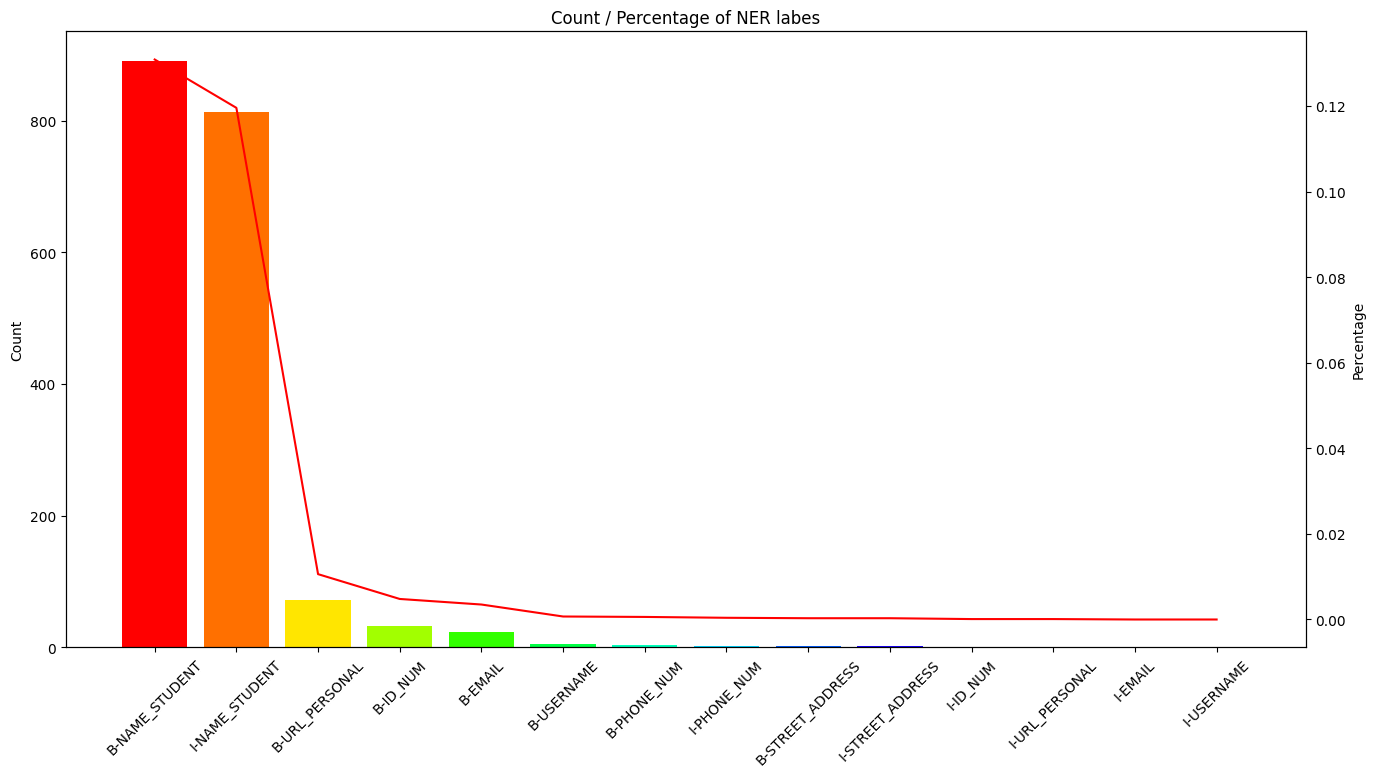

In [73]:
plot_ner_distribution(ner_labels_stat, 'doc_count', 'doc_count_percentage')

In [69]:
# 고유한 NER 레이블을 추출
unique_labels = ner_labels_stat['ner_label'].unique()
unique_labels

array(['B-NAME_STUDENT', 'I-NAME_STUDENT', 'B-URL_PERSONAL', 'B-ID_NUM',
       'B-EMAIL', 'B-USERNAME', 'B-PHONE_NUM', 'I-PHONE_NUM',
       'B-STREET_ADDRESS', 'I-STREET_ADDRESS', 'I-ID_NUM',
       'I-URL_PERSONAL', 'I-EMAIL', 'I-USERNAME'], dtype=object)

In [70]:
'''
 레이블에 대응하는 색상 배열을 생성
 이 색상 배열은 HSV 색공간에서 균일하게 분포된 색상을 사용
'''
colors = plt.cm.hsv(np.linspace(0, 1, len(unique_labels)))
colors

array([[1.        , 0.        , 0.        , 1.        ],
       [1.        , 0.44007397, 0.        , 1.        ],
       [1.        , 0.90330973, 0.        , 1.        ],
       [0.63345452, 1.        , 0.        , 1.        ],
       [0.19338055, 1.        , 0.        , 1.        ],
       [0.        , 1.        , 0.2698539 , 1.        ],
       [0.        , 1.        , 0.73308674, 1.        ],
       [0.        , 0.82684097, 1.        , 1.        ],
       [0.        , 0.36360521, 1.        , 1.        ],
       [0.09963055, 0.        , 1.        , 1.        ],
       [0.53970452, 0.        , 1.        , 1.        ],
       [0.98014676, 0.        , 0.97720648, 1.        ],
       [1.        , 0.        , 0.53382397, 1.        ],
       [1.        , 0.        , 0.09375   , 1.        ]])

In [71]:
color_dict = dict(zip(unique_labels, colors))
color_dict

{'B-NAME_STUDENT': array([1., 0., 0., 1.]),
 'I-NAME_STUDENT': array([1.        , 0.44007397, 0.        , 1.        ]),
 'B-URL_PERSONAL': array([1.        , 0.90330973, 0.        , 1.        ]),
 'B-ID_NUM': array([0.63345452, 1.        , 0.        , 1.        ]),
 'B-EMAIL': array([0.19338055, 1.        , 0.        , 1.        ]),
 'B-USERNAME': array([0.       , 1.       , 0.2698539, 1.       ]),
 'B-PHONE_NUM': array([0.        , 1.        , 0.73308674, 1.        ]),
 'I-PHONE_NUM': array([0.        , 0.82684097, 1.        , 1.        ]),
 'B-STREET_ADDRESS': array([0.        , 0.36360521, 1.        , 1.        ]),
 'I-STREET_ADDRESS': array([0.09963055, 0.        , 1.        , 1.        ]),
 'I-ID_NUM': array([0.53970452, 0.        , 1.        , 1.        ]),
 'I-URL_PERSONAL': array([0.98014676, 0.        , 0.97720648, 1.        ]),
 'I-EMAIL': array([1.        , 0.        , 0.53382397, 1.        ]),
 'I-USERNAME': array([1.     , 0.     , 0.09375, 1.     ])}

## NER labels distributions

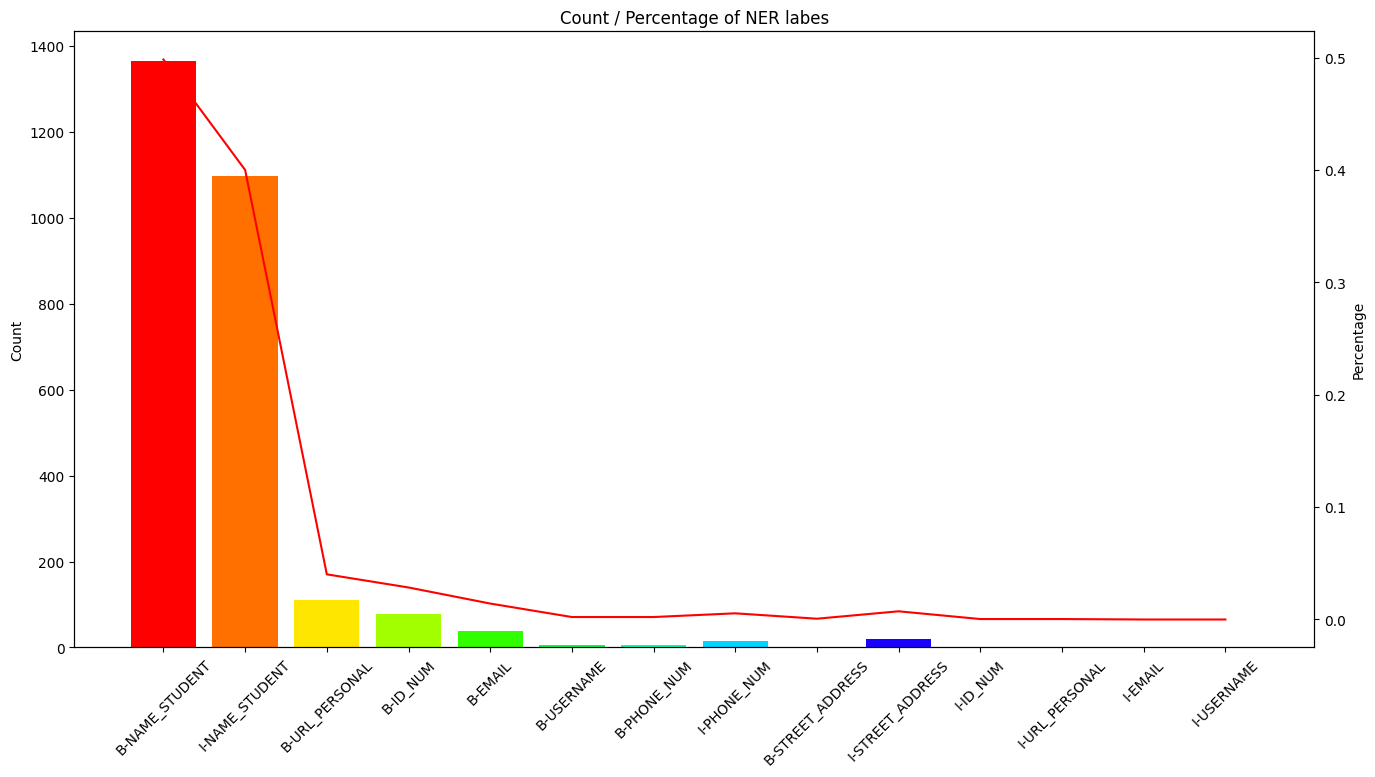

In [64]:
plot_ner_distribution(ner_labels_stat, 'ner_count', 'ner_count_percentage')

## NER label VS POS tag correlation

In [74]:
import spacy

# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

In [75]:
# 예시: 텍스트에 대한 NLP 처리 수행
text = "Apple is looking at buying U.K. startup for $1 billion."
doc = nlp(text)

# 예시: 명명된 엔티티 인식 결과 출력
for ent in doc.ents:
    print(ent.text, ent.label_)

Apple ORG
U.K. GPE
$1 billion MONEY


In [78]:
train_eda_ner_vs_pos = train_EDA[train_EDA['count_ner_labels'] > 0][['document','tokens','labels','ner_labels']]
train_eda_ner_vs_pos

,document,tokens,labels,ner_labels
0,7,"[Design, Thinking, for, innovation, reflexion,...","[O, O, O, O, O, O, O, O, O, B-NAME_STUDENT, I-...","[B-NAME_STUDENT, I-NAME_STUDENT, B-NAME_STUDEN..."
1,10,"[Diego, Estrada, \n\n, Design, Thinking, Assig...","[B-NAME_STUDENT, I-NAME_STUDENT, O, O, O, O, O...","[B-NAME_STUDENT, I-NAME_STUDENT, B-NAME_STUDEN..."
2,16,"[Reporting, process, \n\n, by, Gilberto, Gambo...","[O, O, O, O, B-NAME_STUDENT, I-NAME_STUDENT, O...","[B-NAME_STUDENT, I-NAME_STUDENT]"
3,20,"[Design, Thinking, for, Innovation, \n\n, Sind...","[O, O, O, O, O, B-NAME_STUDENT, I-NAME_STUDENT...","[B-NAME_STUDENT, I-NAME_STUDENT]"
4,56,"[Assignment, :, , Visualization, , Reflecti...","[O, O, O, O, O, O, O, O, O, O, O, O, B-NAME_ST...","[B-NAME_STUDENT, I-NAME_STUDENT]"
...,...,...,...,...
2802,13342,"[Carlos, Hernandez, \n\n, Rehabilitation, -, S...","[B-NAME_STUDENT, I-NAME_STUDENT, O, O, O, O, O...","[B-NAME_STUDENT, I-NAME_STUDENT, B-NAME_STUDEN..."
3262,14484,"[REFLECTION, :, MIND, MAPPING, \n\n, Challenge...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",[B-EMAIL]
3769,15717,"[Visualization, \n\n, Visualization, refers, t...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[B-ID_NUM, B-ID_NUM]"
5239,19280,"[Learning, Launch, based, on, Design, Thinking...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[B-ID_NUM, I-ID_NUM]"


In [79]:
train_eda_ner_vs_pos['pos_text'] = train_eda_ner_vs_pos.apply(lambda row: ' '.join([token for token, label in zip(row['tokens'], row['labels']) if label != 'O']), axis=1)
train_eda_ner_vs_pos

,document,tokens,labels,ner_labels,pos_text
0,7,"[Design, Thinking, for, innovation, reflexion,...","[O, O, O, O, O, O, O, O, O, B-NAME_STUDENT, I-...","[B-NAME_STUDENT, I-NAME_STUDENT, B-NAME_STUDEN...",Nathalie Sylla Nathalie Sylla Nathalie Sylla
1,10,"[Diego, Estrada, \n\n, Design, Thinking, Assig...","[B-NAME_STUDENT, I-NAME_STUDENT, O, O, O, O, O...","[B-NAME_STUDENT, I-NAME_STUDENT, B-NAME_STUDEN...",Diego Estrada Diego Estrada
2,16,"[Reporting, process, \n\n, by, Gilberto, Gambo...","[O, O, O, O, B-NAME_STUDENT, I-NAME_STUDENT, O...","[B-NAME_STUDENT, I-NAME_STUDENT]",Gilberto Gamboa
3,20,"[Design, Thinking, for, Innovation, \n\n, Sind...","[O, O, O, O, O, B-NAME_STUDENT, I-NAME_STUDENT...","[B-NAME_STUDENT, I-NAME_STUDENT]",Sindy Samaca
4,56,"[Assignment, :, , Visualization, , Reflecti...","[O, O, O, O, O, O, O, O, O, O, O, O, B-NAME_ST...","[B-NAME_STUDENT, I-NAME_STUDENT]",Nadine Born
...,...,...,...,...,...
2802,13342,"[Carlos, Hernandez, \n\n, Rehabilitation, -, S...","[B-NAME_STUDENT, I-NAME_STUDENT, O, O, O, O, O...","[B-NAME_STUDENT, I-NAME_STUDENT, B-NAME_STUDEN...",Carlos Hernandez Carlos Hernandez
3262,14484,"[REFLECTION, :, MIND, MAPPING, \n\n, Challenge...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",[B-EMAIL],hbrown@yahoo.com
3769,15717,"[Visualization, \n\n, Visualization, refers, t...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[B-ID_NUM, B-ID_NUM]",IV-8322 IV-8322
5239,19280,"[Learning, Launch, based, on, Design, Thinking...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[B-ID_NUM, I-ID_NUM]",Z.S. 30407059


In [80]:
docs = nlp.pipe(train_eda_ner_vs_pos['pos_text']) 
docs

<generator object Language.pipe at 0x79c1ee0131b0>

In [81]:
train_eda_ner_vs_pos['pos_tags'] = [[token.pos_ for token in doc] for doc in docs]
train_eda_ner_vs_pos

,document,tokens,labels,ner_labels,pos_text,pos_tags
0,7,"[Design, Thinking, for, innovation, reflexion,...","[O, O, O, O, O, O, O, O, O, B-NAME_STUDENT, I-...","[B-NAME_STUDENT, I-NAME_STUDENT, B-NAME_STUDEN...",Nathalie Sylla Nathalie Sylla Nathalie Sylla,"[PROPN, PROPN, PROPN, PROPN, PROPN, PROPN]"
1,10,"[Diego, Estrada, \n\n, Design, Thinking, Assig...","[B-NAME_STUDENT, I-NAME_STUDENT, O, O, O, O, O...","[B-NAME_STUDENT, I-NAME_STUDENT, B-NAME_STUDEN...",Diego Estrada Diego Estrada,"[PROPN, PROPN, PROPN, PROPN]"
2,16,"[Reporting, process, \n\n, by, Gilberto, Gambo...","[O, O, O, O, B-NAME_STUDENT, I-NAME_STUDENT, O...","[B-NAME_STUDENT, I-NAME_STUDENT]",Gilberto Gamboa,"[PROPN, PROPN]"
3,20,"[Design, Thinking, for, Innovation, \n\n, Sind...","[O, O, O, O, O, B-NAME_STUDENT, I-NAME_STUDENT...","[B-NAME_STUDENT, I-NAME_STUDENT]",Sindy Samaca,"[PROPN, PROPN]"
4,56,"[Assignment, :, , Visualization, , Reflecti...","[O, O, O, O, O, O, O, O, O, O, O, O, B-NAME_ST...","[B-NAME_STUDENT, I-NAME_STUDENT]",Nadine Born,"[PROPN, VERB]"
...,...,...,...,...,...,...
2802,13342,"[Carlos, Hernandez, \n\n, Rehabilitation, -, S...","[B-NAME_STUDENT, I-NAME_STUDENT, O, O, O, O, O...","[B-NAME_STUDENT, I-NAME_STUDENT, B-NAME_STUDEN...",Carlos Hernandez Carlos Hernandez,"[PROPN, PROPN, PROPN, PROPN]"
3262,14484,"[REFLECTION, :, MIND, MAPPING, \n\n, Challenge...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",[B-EMAIL],hbrown@yahoo.com,[X]
3769,15717,"[Visualization, \n\n, Visualization, refers, t...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[B-ID_NUM, B-ID_NUM]",IV-8322 IV-8322,"[PROPN, PROPN]"
5239,19280,"[Learning, Launch, based, on, Design, Thinking...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[B-ID_NUM, I-ID_NUM]",Z.S. 30407059,"[PROPN, NUM]"


In [82]:
train_eda_ner_vs_pos.drop(columns=['pos_text'], inplace=True)
train_eda_ner_vs_pos

,document,tokens,labels,ner_labels,pos_tags
0,7,"[Design, Thinking, for, innovation, reflexion,...","[O, O, O, O, O, O, O, O, O, B-NAME_STUDENT, I-...","[B-NAME_STUDENT, I-NAME_STUDENT, B-NAME_STUDEN...","[PROPN, PROPN, PROPN, PROPN, PROPN, PROPN]"
1,10,"[Diego, Estrada, \n\n, Design, Thinking, Assig...","[B-NAME_STUDENT, I-NAME_STUDENT, O, O, O, O, O...","[B-NAME_STUDENT, I-NAME_STUDENT, B-NAME_STUDEN...","[PROPN, PROPN, PROPN, PROPN]"
2,16,"[Reporting, process, \n\n, by, Gilberto, Gambo...","[O, O, O, O, B-NAME_STUDENT, I-NAME_STUDENT, O...","[B-NAME_STUDENT, I-NAME_STUDENT]","[PROPN, PROPN]"
3,20,"[Design, Thinking, for, Innovation, \n\n, Sind...","[O, O, O, O, O, B-NAME_STUDENT, I-NAME_STUDENT...","[B-NAME_STUDENT, I-NAME_STUDENT]","[PROPN, PROPN]"
4,56,"[Assignment, :, , Visualization, , Reflecti...","[O, O, O, O, O, O, O, O, O, O, O, O, B-NAME_ST...","[B-NAME_STUDENT, I-NAME_STUDENT]","[PROPN, VERB]"
...,...,...,...,...,...
2802,13342,"[Carlos, Hernandez, \n\n, Rehabilitation, -, S...","[B-NAME_STUDENT, I-NAME_STUDENT, O, O, O, O, O...","[B-NAME_STUDENT, I-NAME_STUDENT, B-NAME_STUDEN...","[PROPN, PROPN, PROPN, PROPN]"
3262,14484,"[REFLECTION, :, MIND, MAPPING, \n\n, Challenge...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",[B-EMAIL],[X]
3769,15717,"[Visualization, \n\n, Visualization, refers, t...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[B-ID_NUM, B-ID_NUM]","[PROPN, PROPN]"
5239,19280,"[Learning, Launch, based, on, Design, Thinking...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[B-ID_NUM, I-ID_NUM]","[PROPN, NUM]"
